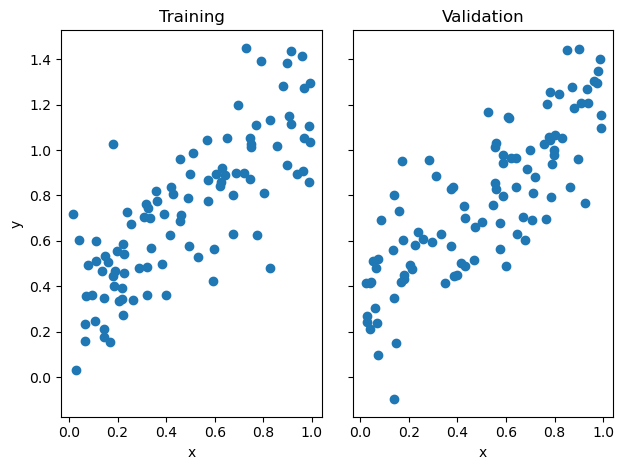

In [86]:
%reload_ext autoreload 
%autoreload 2

import numpy as np
from linearRegression import LinearRegression
from matplotlib import pyplot as plt


def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()




Training score (Analytical) = 0.6311
Validation score (Analytical) = 0.6552
Training score (Gradient)= 0.5875
Validation score (Gradient) = 0.6068


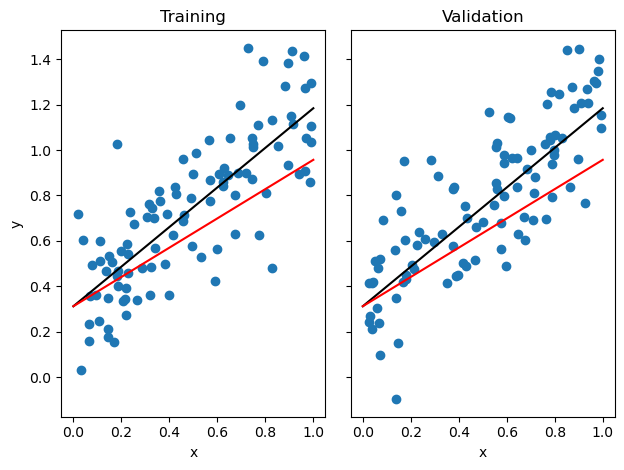

In [87]:
LR = LinearRegression()
LR.fit_analytical(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score (Analytical) = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score (Analytical) = {LR.score(X_val, y_val).round(4)}")

LR2 = LinearRegression()
LR2.fit_gradient(X_train, y_train, alpha = 0.0005) 

print(f"Training score (Gradient)= {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score (Gradient) = {LR2.score(X_val, y_val).round(4)}")


x = np.linspace(0, 1, 101)
y_analytical = (LR.w[0]*x + LR.w[1])
y_gradient = (LR2.w[0]*x + LR.w[1])


fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
axarr[0].plot(x, y_analytical, color="black")
axarr[1].plot(x, y_analytical, color="black")
axarr[0].plot(x, y_gradient, color="red")
axarr[1].plot(x, y_gradient, color="red")
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()


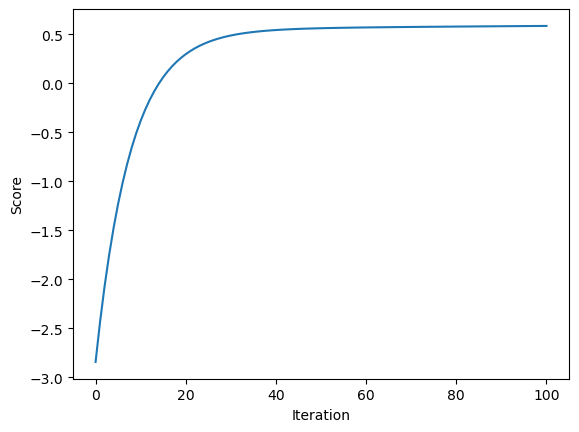

[-2.842677336780286, -2.4317063341054133, -2.0704702560157506, -1.7529423373791695, -1.4738261780386352, -1.2284672317617367, -1.0127750216191442, -0.8231547818833795, -0.6564473840718639, -0.5098765431998613, -0.3810024219732129, -0.26768085757079585, -0.16802752962937317, -0.08038647061906934, -0.0033023923662069965, 0.06450363374569212, 0.12415554932046624, 0.17664109140970397, 0.2228282987746758, 0.2634800177965123, 0.29926665045216305, 0.33077735739571934, 0.35852990336694746, 0.38297930945994385, 0.4045254568455019, 0.4235197690178454, 0.44027108423701267, 0.4550508163050284, 0.4680974899208722, 0.4796207264074518, 0.4898047464185994, 0.49881144816205125, 0.506783112580548, 0.5138447806990539, 0.5201063428674426, 0.5256643748133133, 0.5306037511883614, 0.5349990635733047, 0.5389158666385249, 0.5424117732858008, 0.54553741707273, 0.5483372980035056, 0.5508505258205909, 0.5531114732188891, 0.5551503498986738, 0.556993707050631, 0.5586648807037611, 0.5601843813452023, 0.561570236323

In [89]:
plt.plot(LR2.score_history)

labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")
plt.show()

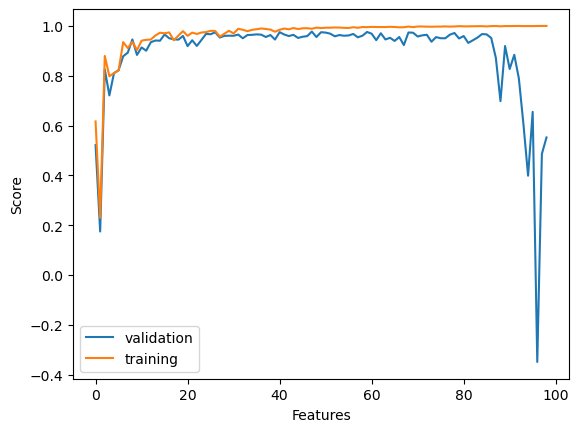

In [69]:
n_train = 100
n_val = 100
noise = 0.2

number_features = []  
validation_score = [] 
training_score = []

LR = LinearRegression()

for p_features in range(1, n_val):
    number_features.append(p_features)
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR.fit_analytical(X_train, y_train)
    validation_score.append(LR.score(X_val, y_val))
    training_score.append(LR.score(X_train, y_train))

plt.plot(validation_score, label = "validation")
plt.plot(training_score, label = "training")
plt.legend(loc='best')
labels = plt.gca().set(xlabel = "Features", ylabel = "Score")
plt.show()
    

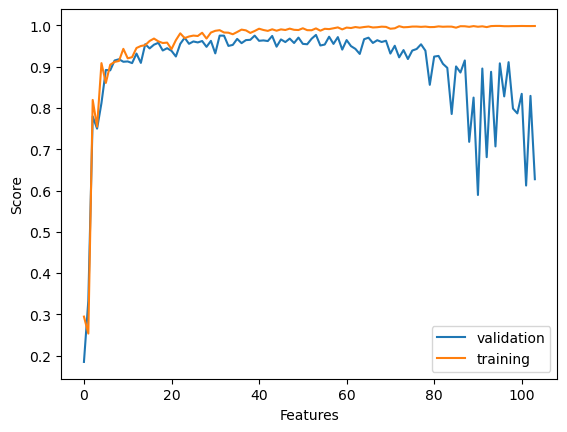

In [70]:
from sklearn.linear_model import Lasso

n_train = 100
n_val = 100
noise = 0.2

number_features = []  
validation_score = [] 
training_score = []

L = Lasso(alpha=0.001)

for p_features in range(1, n_val+5):
    number_features.append(p_features)
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    L.fit(X_train, y_train)
    validation_score.append(L.score(X_val, y_val))
    training_score.append(L.score(X_train, y_train))

plt.plot(validation_score, label = "validation")
plt.plot(training_score, label = "training")
plt.legend(loc='best')
labels = plt.gca().set(xlabel = "Features", ylabel = "Score")
plt.show()